In [11]:
import os
import cv2
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

#### Loading images

In [12]:
# Set paths to your dataset
CatDir = './train/cats'
DogDir = './train/dogs'
Images = []
Labels = []
ImgSize = 64
# Label for cats is zero
for filename in os.listdir(CatDir):
    ImgPath = os.path.join(CatDir, filename)
    Img = cv2.imread(ImgPath)
    if Img is not None:
        Img = cv2.resize(Img, (ImgSize, ImgSize))
        Images.append(Img)
        Labels.append(0)

# Label for dogs is one
for filename in os.listdir(DogDir):
    ImgPath = os.path.join(DogDir, filename)
    Img = cv2.imread(ImgPath)
    if Img is not None:
        Img = cv2.resize(Img, (ImgSize, ImgSize))
        Images.append(Img)
        Labels.append(1)


#### Preprocessing

In [13]:
Images = np.array(Images)
Labels = np.array(Labels)

# Flattening images for input
n_samples = len(Images)
Images = Images.reshape((n_samples, -1))
XTrain, XTest, YTrain, YTest = train_test_split(Images, Labels, test_size=0.2, random_state=42)
scaler = StandardScaler()
XTrain = scaler.fit_transform(XTrain)
XTest = scaler.transform(XTest)

#### SVM Model

In [14]:
SVM = SVC(kernel='linear', random_state=42)
SVM.fit(XTrain, YTrain)
YPred = SVM.predict(XTest)


#### Evaluating the model

In [15]:
Acc = accuracy_score(YTest, YPred)
print(f'Accuracy: {Acc:.4f}')
print('Classification Report:')
print(classification_report(YTest, YPred))

Accuracy: 0.6286
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.63      0.65        78
           1       0.57      0.63      0.60        62

    accuracy                           0.63       140
   macro avg       0.63      0.63      0.63       140
weighted avg       0.63      0.63      0.63       140



#### Confusion Matrix

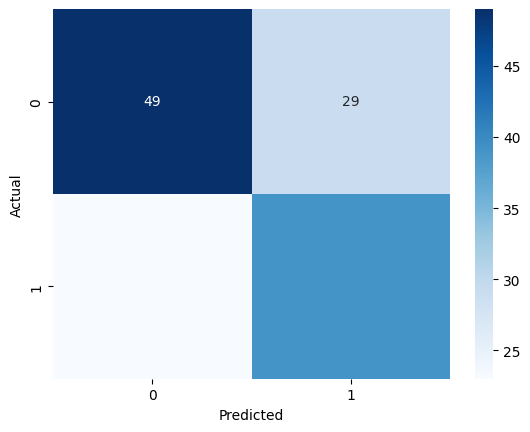

In [16]:
ConfusionMat = confusion_matrix(YTest, YPred)
sns.heatmap(ConfusionMat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()